In [66]:
import matplotlib.pyplot as plt

from tick.plot import plot_hawkes_kernels
import numpy as np
import matplotlib.pyplot as plt

from tick.hawkes import HawkesKernel0, HawkesKernelExp, HawkesKernelPowerLaw, HawkesKernelTimeFunc,HawkesKernelSumExp
import matplotlib.pyplot as plt
import numpy as np
from tick.base import TimeFunction
from tick.plot import plot_timefunction

from tick.plot import plot_point_process
from tick.hawkes import SimuHawkes, HawkesKernelSumExp,HawkesExpKern
import matplotlib.pyplot as plt
import pickle





## 1-D Datasets

### Sinusoid

Trigerring kernel

\begin{equation*}
\phi = max(0,\frac{sin(t)}{8}) \mspace{18mu}  for \mspace{18mu}    0\leq t \leq4
\end{equation*}

With base intensity            

\begin{equation*}
\mspace{55mu} \mu = 0.2
\end{equation*}


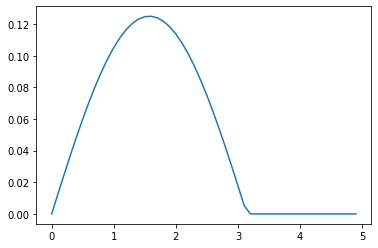

In [67]:
t = np.arange(0,5,0.1)
tc = t.copy()
tc[tc>4] =0
sin = np.sin(tc)/8
sin[sin <0] =0
kernel = HawkesKernelTimeFunc(t_values=t, y_values=sin)
t_values = np.arange(0,5,0.1)
plt.plot(t_values,kernel.get_values(t_values))

In [68]:

run_time = 200
hawkes = SimuHawkes(n_nodes=1, end_time=200, verbose=False, seed=42)


hawkes.set_kernel(0, 0, kernel)
hawkes.set_baseline(0, 0.2)
dt = 0.001
hawkes.track_intensity(dt)
times = [ ]
intensities = []
for i in range(4000):
    hawkes.simulate()
    timestamps = hawkes.timestamps

    intensity = hawkes.tracked_intensity
    intensity_times = hawkes.intensity_tracked_times
    times.append(timestamps)

    
    seq_intensities =[]
    intensity_times = np.round(intensity_times,3)
    timestamps  = np.round(timestamps[0],3)
    for i in timestamps:
        seq_intensities.append(np.mean(intensity[0][np.where(intensity_times==i)[0]]))
    
    intensities.append(np.array(seq_intensities))    
    
    hawkes.reset()

    
types= [np.zeros(len(time[0])) for time in times]

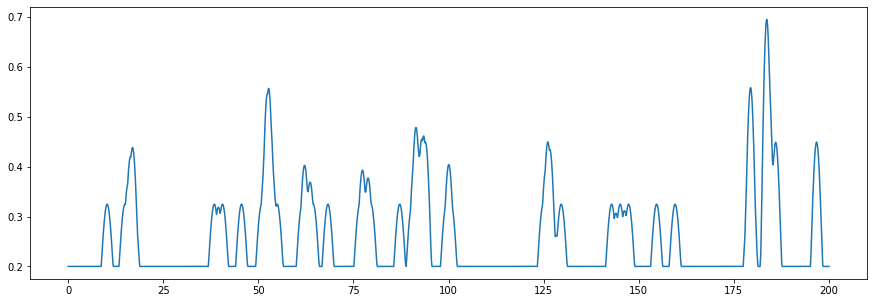

In [69]:
plt.figure(figsize=(15,5))
plt.plot(intensity_times,intensity[0])
plt.show()

In [70]:
sinusodial_1d_hawkes ={}
sinusodial_1d_hawkes['mu'] =[0.2]
sinusodial_1d_hawkes['timestamps'] = times
sinusodial_1d_hawkes['types'] = types
sinusodial_1d_hawkes['intensities'] = intensities


sinusodial_1d_hawkes['tmax'] = 200

timestamps=sinusodial_1d_hawkes['timestamps']


lenghts = np.array([len(sequence[0]) for sequence in timestamps])
sinusodial_1d_hawkes['lengths']  = lenghts
sinusodial_1d_hawkes['process_dim']  = 1



with open('data/simulated/sinusodial_1d_hawkes.pkl', 'wb') as handle:
    pickle.dump(sinusodial_1d_hawkes, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Power law kernel

Trigerring kernel

\begin{equation*}
\phi = 0.2 x (0.5 +t)^{-1.3}
\end{equation*}

With base intensity            

\begin{equation*}
\mspace{55mu} \mu = 0.1
\end{equation*}


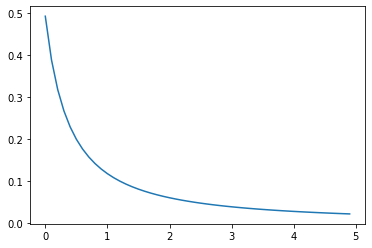

In [72]:
kernel = HawkesKernelPowerLaw(0.2, 0.5, 1.3)
t_values = np.arange(0,5,0.1)
plt.plot(t_values,kernel.get_values(t_values))
plt.show()

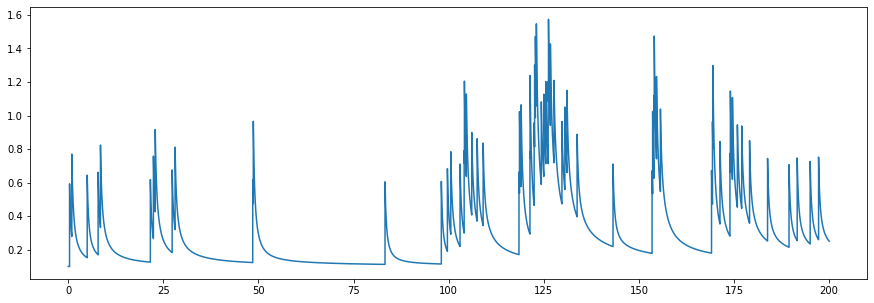

In [73]:
run_time = 200
hawkes = SimuHawkes(n_nodes=1, end_time=200, verbose=False, seed=42)


hawkes.set_kernel(0, 0, kernel)
hawkes.set_baseline(0, 0.1)
dt = 0.01
hawkes.track_intensity(dt)

times = [ ]
for i in range(4000):
    hawkes.simulate()
    timestamps = hawkes.timestamps

    intensity = hawkes.tracked_intensity
    intensity_times = hawkes.intensity_tracked_times
    times.append(timestamps)

    
    seq_intensities =[]
    intensity_times = np.round(intensity_times,3)
    timestamps  = np.round(timestamps[0],3)
    for i in timestamps:
        seq_intensities.append(np.mean(intensity[0][np.where(intensity_times==i)[0]]))
    
    intensities.append(np.array(seq_intensities))    
    
    hawkes.reset()
    
types= [np.zeros(len(time[0])) for time in times]


plt.figure(figsize=(15,5))
plt.plot(intensity_times,intensity[0])

In [74]:
pow_kernel_1d_hawkes ={}
pow_kernel_1d_hawkes['mu'] =[0.1]
pow_kernel_1d_hawkes['timestamps'] = times
pow_kernel_1d_hawkes['types'] = types
pow_kernel_1d_hawkes['intensities'] = intensities


pow_kernel_1d_hawkes['tmax'] = 200

timestamps=pow_kernel_1d_hawkes['timestamps']


lenghts = np.array([len(sequence[0]) for sequence in timestamps])
pow_kernel_1d_hawkes['lengths']  = lenghts
pow_kernel_1d_hawkes['process_dim']  = 1





with open('data/simulated/power_kernel_1d_hawkes.pkl', 'wb') as handle:
    pickle.dump(sinusodial_1d_hawkes, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Self Correction

## 2-D Datasets

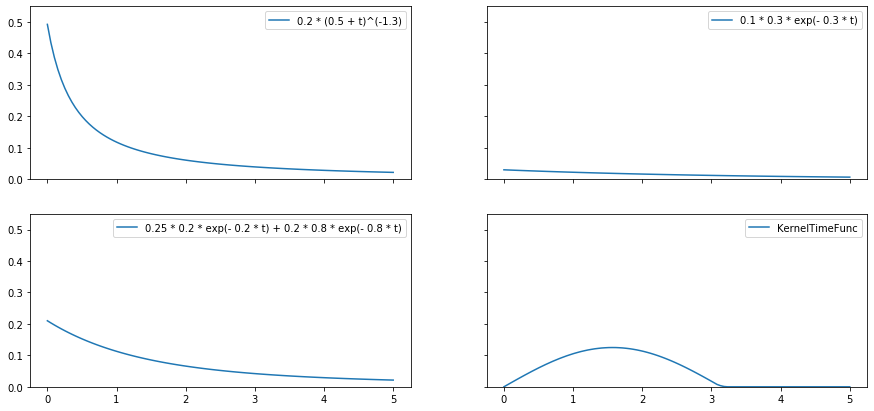

In [43]:

t = np.arange(0,5,0.1)
tc = t.copy()
tc[tc>4] =0
sin = np.sin(tc)/8
sin[sin <0] =0
kernel_4 = HawkesKernelTimeFunc(t_values=t, y_values=sin)
kernel_2 = HawkesKernelExp(.1, 0.3)
kernel_3 = HawkesKernelSumExp(intensities = np.array([0.25,0.2]),decays = np.array([0.2,0.8]))
kernel_1 = HawkesKernelPowerLaw(0.2, 0.5, 1.3)

t_values = np.array([0, 1, 1.5, 1.8, 2.7])
y_values = np.array([0, .6, .34, .2, .1])
kernel_tf = HawkesKernelTimeFunc(t_values=t_values, y_values=y_values)

kernels = [[kernel_1, kernel_2], [kernel_3, kernel_4]]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 7))

t_values = np.linspace(0, 5, 100)
for i in range(2):
    for j in range(2):
        ax[i, j].plot(t_values, kernels[i][j].get_values(t_values),
                      label=kernels[i][j])
        ax[i, j].legend()
        ax[i, j].set_ylim(0,0.55)
plt.show()

In [192]:
run_time = 200
hawkes = SimuHawkes(n_nodes=2, end_time=200, verbose=False, seed=42)
# hawkes = SimuHawkes([[kernel_1,kernel_2],[kernel_3,kernel_4]],baseline=[0.1,0.2],end_time=200, verbose=False, seed=42)


hawkes.set_kernel(0, 0, kernel_1)
hawkes.set_kernel(0, 1, kernel_2)
hawkes.set_kernel(1, 0, kernel_3)
hawkes.set_kernel(1, 1, kernel_4)
hawkes.set_baseline(0, 0.1)
hawkes.set_baseline(1, 0.2)

dt = 0.001
hawkes.track_intensity(dt)

times = [ ]
intensities = []
types = [ ]
for i in range(4000):

    hawkes.simulate()


    
    intensity = hawkes.tracked_intensity
    intensity_times = hawkes.intensity_tracked_times
    timestamps = hawkes.timestamps 
    seq_types = []
    for i in range(hawkes.n_nodes):
        seq_types.append(np.ones(len(timestamps[i]))*i)
    seq_types = np.concatenate(seq_types)
    timestamps = np.concatenate(timestamps)
    sorted_index = np.argsort(timestamps)
    timestamps = timestamps[sorted_index]
    seq_types = seq_types[sorted_index]
    types.append(seq_types)
    times.append(timestamps)
    
    intensity_times = np.round(intensity_times,3)
    timestamps = np.round(timestamps,3)    
    
    i_0 =[]
    i_1 = []
    for i in timestamps:
        i_0.append(np.mean(intensity[0][np.where(intensity_times==i)[0]]))
        i_1.append(np.mean(intensity[1][np.where(intensity_times==i)[0]]))
    intensities.append([i_0,i_1])
    
    

    hawkes.reset()

In [193]:
hawkes_2d ={}
hawkes_2d['mu'] =[0.1,0.2]
hawkes_2d['timestamps'] = times
hawkes_2d['types'] = types
hawkes_2d['intensities'] = intensities


hawkes_2d['tmax'] = 200

timestamps=hawkes_2d['timestamps']


lenghts = np.array([len(sequence) for sequence in timestamps])
hawkes_2d['lengths']  = lenghts
hawkes_2d['process_dim']  = 2




In [196]:
with open('data/simulated/hawkes_2d.pkl', 'wb') as handle:
    pickle.dump(hawkes_2d, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [197]:
len(hawkes_2d['timestamps'])

4000

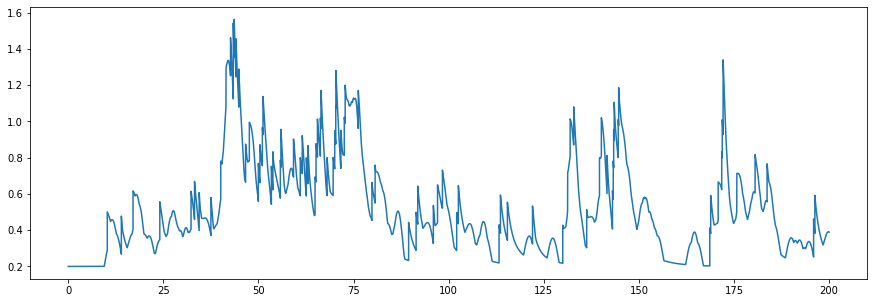

In [194]:
plt.figure(figsize=(15,5))

plt.plot(intensity_times,intensity[1])


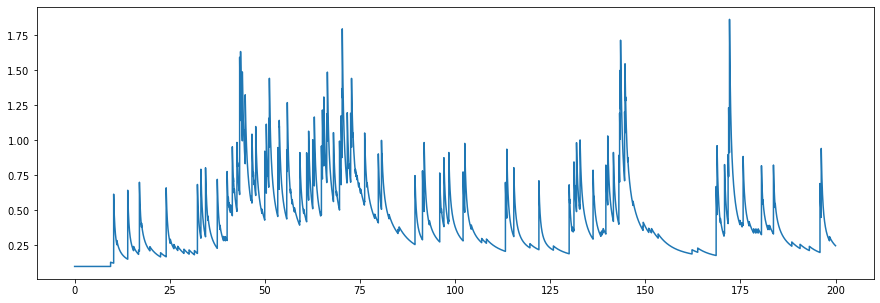

In [195]:
plt.figure(figsize=(15,5))
plt.plot(intensity_times,intensity[0])
